In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error as mae
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Logistic Regression simple approach - 75% score
# DecisionTreeClassifier - 75% score

In [3]:
df = pd.read_csv('heart.csv')
dfo2 = pd.read_csv('o2Saturation.csv') # not important atm

In [4]:
def model_quality(i, x_t, y_t, x_v, y_v):
    model = LogisticRegression(random_state=1, max_iter=i)
    model.fit(x_t, y_t)
    pred = model.predict(x_v)
    return mae(y_v, pred)

In [5]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<BarContainer object of 2 artists>

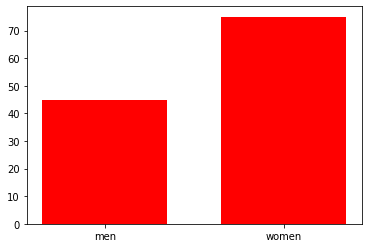

In [59]:
men = df[(df['sex'] == 1) & (df['output'] == 1)]['sex'].count()/df[df['sex'] == 1]['sex'].count() * 100
women = df[(df['sex'] == 0) & (df['output'] == 1)]['sex'].count()/df[df['sex'] == 0]['sex'].count() * 100
plt.bar(['men','women'], [men, women], width=0.7, align='center', color='red')

([<matplotlib.axis.XTick at 0x25d2ccb40a0>,
 [Text(0, 0, ''), Text(0, 0, '')])

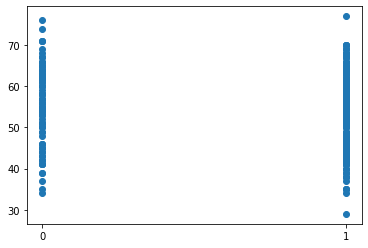

In [70]:
plt.scatter(df['sex'], df['age'])
plt.xticks([0, 1])

In [ ]:
y = df['output']
features = ['age', 'sex', 'cp', 'trtbps', 'fbs', 'chol']
X = df[features]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1)

In [ ]:
model_logistic_regression = LogisticRegression(random_state=1, max_iter=75)
model_logistic_regression.fit(X_train, y_train)
pred_logistic_regression = model_logistic_regression.predict(X_val)

In [ ]:
model_logistic_regression.score(X_val, y_val)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
def tree_depth(leaf_node_size, X_t=X_train, y_t=y_train, X_v=X_val, y_v=y_val):
    model = RandomForestRegressor(random_state=1, max_leaf_nodes=leaf_node_size)
    model.fit(X_t, y_t)
    pred = model.predict(X_v)
    return mae(y_v, pred)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_dtr = DecisionTreeClassifier(random_state=1, max_leaf_nodes=15)
model_dtr.fit(X_train, y_train)
model_dtr.score(X_val, y_val)